In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import argparse

32.484475912778905
16.993050639823156


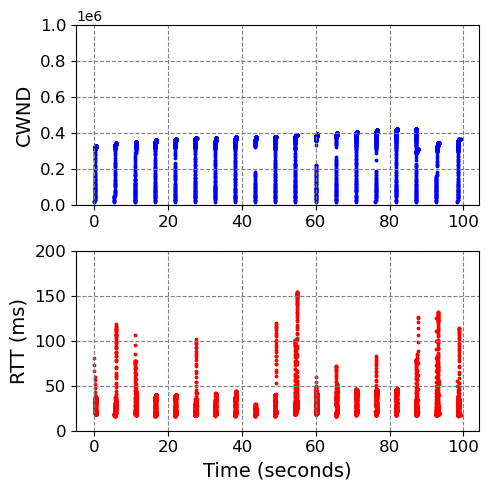

In [536]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming subdir is provided correctly and 'cwnd.csv' is the correct file.
# subdir = 'defaultcubic400_2024-04-14_08-26-06'
#subdir = '800pave_2024-04-14_10-18-21'
#subdir = '400pave_2024-04-14_10-31-24'
subdir = '400pave_2024-04-14_10-28-07'

file_path = os.path.join('result', subdir, 'cwnd.csv')

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    df = pd.read_csv(file_path, header=None, names=['Time', 'CWND', 'RTT'], on_bad_lines='skip')

    # Ensure 'Time' is a float and handle non-numeric with coercion
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)

    # Normalize the 'Time'
    df['Time'] = df['Time'] - df['Time'].min()
    df['Time'] /= 1e9

    df['RTT'] /= 1e3

    # Convert Series to numpy arrays for compatibility with matplotlib
    time_values = df['Time'].to_numpy()
    cwnd_values = df['CWND'].to_numpy()
    rtt_values = df['RTT'].to_numpy()

    print(rtt_values.mean())
    print(rtt_values.std())

    # Plotting
    plt.figure(figsize=(5, 5))
    font_size = 14  # Size of axis titles
    tick_size = 12  # Size of tick labels

    #xlim_min = 85.8
    #xlim_max = 87
    ylim_min = df['RTT'].min()  -2 # Adjust as necessary
    ylim_max = df['RTT'].max() + 10 # Adjust as necessary
    #ylim_max = df['RTT'].min() + 20
    # Plot CWND
    plt.subplot(2, 1, 1)
    plt.scatter(time_values, cwnd_values, color='b', label='CWND', s=3) 
    plt.ylabel('CWND', fontsize=font_size)
    plt.grid(True, linestyle='--', color='grey')  # Dashed grey grid lines
    #plt.xlim([xlim_min, xlim_max])
    plt.tick_params(axis='both', labelsize=tick_size)  # Set tick label sizes
    plt.ylim([0,1000000])

    # Plot RTT
    plt.subplot(2, 1, 2)
    plt.scatter(time_values, rtt_values, color='r', label='RTT', s = 3)
    plt.xlabel('Time (seconds)', fontsize=font_size)
    plt.ylabel('RTT (ms)', fontsize=font_size)
    plt.grid(True, linestyle='--', color='grey')  # Dashed grey grid lines
    plt.ylim([0, 200])
    
    #plt.xlim([xlim_min, xlim_max])
    plt.tick_params(axis='both', labelsize=tick_size)  # Set tick label sizes
    plt.tight_layout()
    plt.show()

37.89580477223427
29.523627745070574


/tmp/ipykernel_1653378/1235424051.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] -= start


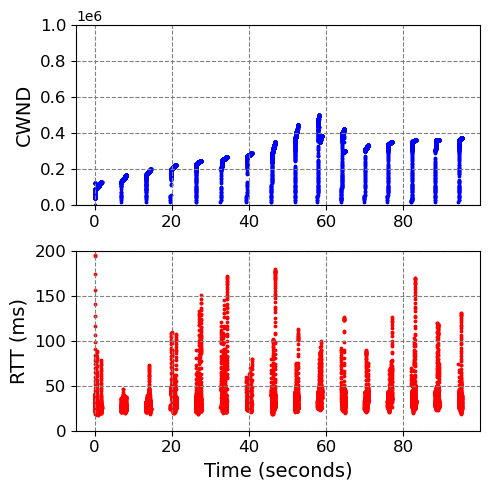

In [348]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming subdir is provided correctly and 'cwnd.csv' is the correct file.
# subdir = 'defaultcubic400_2024-04-14_08-26-06'
subdir = '800default_2024-04-14_11-55-12'
#subdir = '400pave_2024-04-14_10-31-24'
#subdir = '400pave_2024-04-14_10-28-07'

file_path = os.path.join('result', subdir, 'cwnd.csv')

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    df = pd.read_csv(file_path, header=None, names=['Time', 'CWND', 'RTT'], on_bad_lines='skip')

    # Ensure 'Time' is a float and handle non-numeric with coercion
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)

    # Normalize the 'Time'
    df['Time'] = df['Time'] - df['Time'].min()
    df['Time'] /= 1e9

    df['RTT'] /= 1e3

    
    # Filter data for the time range 85.9 to 86.2 seconds
    start = 0
    end = 100
    filtered_df = df[(df['Time'] >= start) & (df['Time'] <= end)]
    filtered_df['Time'] -= start

    # Convert Series to numpy arrays for compatibility with matplotlib
    time_values = filtered_df['Time'].to_numpy()
    cwnd_values = filtered_df['CWND'].to_numpy()
    rtt_values = filtered_df['RTT'].to_numpy()

    print(rtt_values.mean())
    print(rtt_values.std())

    # Plotting
    plt.figure(figsize=(5, 5))
    font_size = 14  # Size of axis titles
    tick_size = 12  # Size of tick labels

    #xlim_min = 85.8
    #xlim_max = 87
    ylim_min = df['RTT'].min()  -2 # Adjust as necessary
    ylim_max = df['RTT'].max() + 10 # Adjust as necessary
    #ylim_max = df['RTT'].min() + 20
    # Plot CWND
    plt.subplot(2, 1, 1)
    plt.scatter(time_values, cwnd_values, color='b', label='CWND', s=3) 
    plt.ylabel('CWND', fontsize=font_size)
    plt.grid(True, linestyle='--', color='grey')  # Dashed grey grid lines
    #plt.xlim([xlim_min, xlim_max])
    plt.tick_params(axis='both', labelsize=tick_size)  # Set tick label sizes
    plt.ylim([0,1000000])

    # Plot RTT
    plt.subplot(2, 1, 2)
    plt.scatter(time_values, rtt_values, color='r', label='RTT', s = 3)
    plt.xlabel('Time (seconds)', fontsize=font_size)
    plt.ylabel('RTT (ms)', fontsize=font_size)
    plt.grid(True, linestyle='--', color='grey')  # Dashed grey grid lines
    plt.ylim([0, 200])
    
    #plt.xlim([xlim_min, xlim_max])
    plt.tick_params(axis='both', labelsize=tick_size)  # Set tick label sizes
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1653378/3602382678.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] -= start


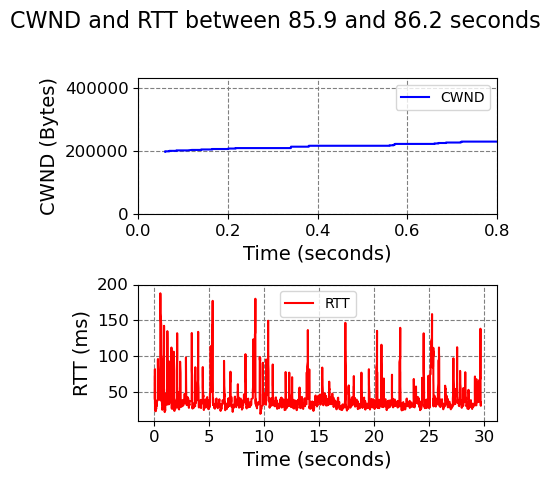

In [301]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the base directory and file name are correctly specified.
subdir = 'noretx_test'
file_path = os.path.join('result', subdir, 'cwnd.csv')

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    # Load the data
    df = pd.read_csv(file_path, header=None, names=['Time', 'CWND', 'RTT'], on_bad_lines='skip')
    
    # Clean and normalize the data
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df['Time'] = df['Time'] - df['Time'].min()
    df['Time'] /= 1e9  # Normalize time to seconds
    df['RTT'] /= 1e3  # Convert RTT to milliseconds

    # Filter data for the time range 85.9 to 86.2 seconds
    start = 0.2
    end = 30
    filtered_df = df[(df['Time'] >= start) & (df['Time'] <= end)]
    filtered_df['Time'] -= start

    # Convert Series to numpy arrays for compatibility with matplotlib
    time_values = filtered_df['Time'].to_numpy()
    cwnd_values = filtered_df['CWND'].to_numpy()
    rtt_values = filtered_df['RTT'].to_numpy()


    # Plotting
    plt.figure(figsize=(5, 5))  # Increase figure size for better readability
    plt.suptitle('CWND and RTT between 85.9 and 86.2 seconds', fontsize=16)

    # Plot CWND
    plt.subplot(2, 1, 1)
    plt.plot(time_values, cwnd_values, color='blue', label='CWND')
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('CWND (Bytes)', fontsize=14)
    plt.grid(True, linestyle='--', color='grey')
    plt.legend()
    plt.tick_params(axis='both', labelsize=12)
    plt.xlim([0,0.8])
    plt.ylim([0,430000])


    # Plot RTT
    plt.subplot(2, 1, 2)
    plt.plot(time_values, rtt_values, color='red', label='RTT')
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('RTT (ms)', fontsize=14)
    plt.grid(True, linestyle='--', color='grey')
    plt.legend()
    plt.tick_params(axis='both', labelsize=12)
    plt.ylim([10, 200])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

/tmp/ipykernel_1653378/2981379271.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] -= start


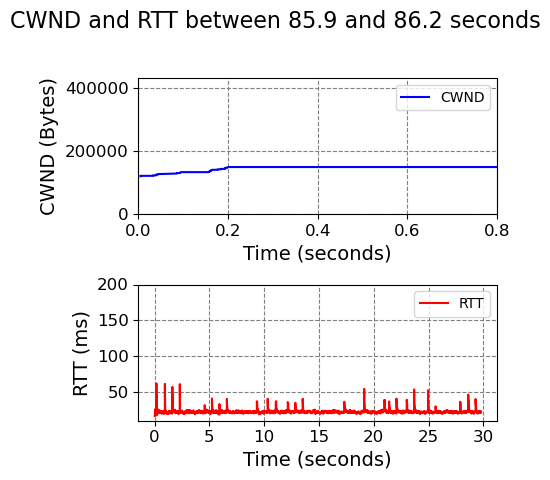

In [298]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the base directory and file name are correctly specified.
subdir = 'ul_test'
file_path = os.path.join('result', subdir, 'cwnd.csv')

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    # Load the data
    df = pd.read_csv(file_path, header=None, names=['Time', 'CWND', 'RTT'], on_bad_lines='skip')
    
    # Clean and normalize the data
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df['Time'] = df['Time'] - df['Time'].min()
    df['Time'] /= 1e9  # Normalize time to seconds
    df['RTT'] /= 1e3  # Convert RTT to milliseconds

    # Filter data for the time range 85.9 to 86.2 seconds
    start = 0.2
    end = 30
    filtered_df = df[(df['Time'] >= start) & (df['Time'] <= end)]
    filtered_df['Time'] -= start

    # Convert Series to numpy arrays for compatibility with matplotlib
    time_values = filtered_df['Time'].to_numpy()
    cwnd_values = filtered_df['CWND'].to_numpy()
    rtt_values = filtered_df['RTT'].to_numpy()

    # Convert Series to numpy arrays for compatibility with matplotlib
    time_values = filtered_df['Time'].to_numpy()
    cwnd_values = filtered_df['CWND'].to_numpy()
    rtt_values = filtered_df['RTT'].to_numpy()

    # Plotting
    plt.figure(figsize=(5, 5))  # Increase figure size for better readability
    plt.suptitle('CWND and RTT between 85.9 and 86.2 seconds', fontsize=16)

    # Plot CWND
    plt.subplot(2, 1, 1)
    plt.plot(time_values, cwnd_values, color='blue', label='CWND')
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('CWND (Bytes)', fontsize=14)
    plt.grid(True, linestyle='--', color='grey')
    plt.legend()
    plt.tick_params(axis='both', labelsize=12)
    plt.xlim([0,0.8])
    plt.ylim([0,430000])
    
    # Plot RTT
    plt.subplot(2, 1, 2)
    plt.plot(time_values, rtt_values, color='red', label='RTT')
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('RTT (ms)', fontsize=14)
    plt.grid(True, linestyle='--', color='grey')
    plt.legend()
    plt.tick_params(axis='both', labelsize=12)
    plt.ylim([10, 200])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

/tmp/ipykernel_1653378/963265406.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] -= start


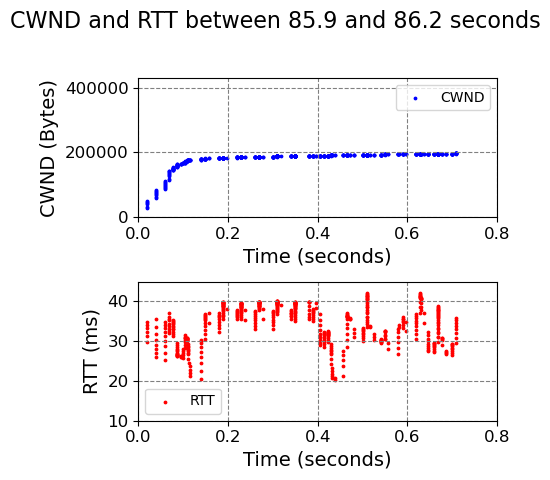

In [535]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the base directory and file name are correctly specified.
subdir = '400def_2024-04-14_10-38-15'
file_path = os.path.join('result', subdir, 'cwnd.csv')

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    # Load the data
    df = pd.read_csv(file_path, header=None, names=['Time', 'CWND', 'RTT'], on_bad_lines='skip')
    
    # Clean and normalize the data
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df['Time'] = df['Time'] - df['Time'].min()
    df['Time'] /= 1e9  # Normalize time to seconds
    df['RTT'] /= 1e3  # Convert RTT to milliseconds

    # Filter data for the time range 85.9 to 86.2 seconds
    start = 23.6
    end = 29.2
    filtered_df = df[(df['Time'] >= start) & (df['Time'] <= end)]
    filtered_df['Time'] -= start

    # Convert Series to numpy arrays for compatibility with matplotlib
    time_values = filtered_df['Time'].to_numpy()
    cwnd_values = filtered_df['CWND'].to_numpy()
    rtt_values = filtered_df['RTT'].to_numpy()

    # Plotting
    plt.figure(figsize=(5, 5))  # Increase figure size for better readability
    plt.suptitle('CWND and RTT between 85.9 and 86.2 seconds', fontsize=16)

    # Plot CWND
    plt.subplot(2, 1, 1)
    plt.scatter(time_values, cwnd_values, color='blue', label='CWND', s = 3)
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('CWND (Bytes)', fontsize=14)
    plt.grid(True, linestyle='--', color='grey')
    plt.legend()
    plt.tick_params(axis='both', labelsize=12)
    plt.xlim([0,0.8])
    plt.ylim([0,430000])

    # Plot RTT
    plt.subplot(2, 1, 2)
    plt.scatter(time_values, rtt_values, color='red', label='RTT', s = 3)
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('RTT (ms)', fontsize=14)
    plt.grid(True, linestyle='--', color='grey')
    plt.legend()
    plt.tick_params(axis='both', labelsize=12)
    plt.xlim([0,0.8])
    plt.ylim([10, 45])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

/tmp/ipykernel_1653378/570947968.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] -= start
/tmp/ipykernel_1653378/570947968.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] -= 0.359
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


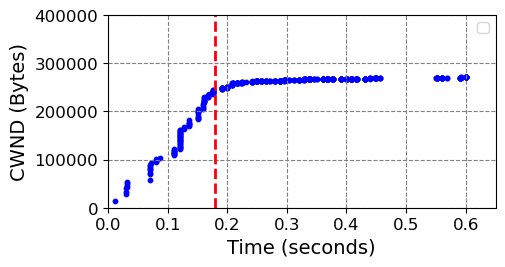

In [537]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the base directory and file name are correctly specified.
subdir = 'starter_2024-04-14_23-06-15'
file_path = os.path.join('result', subdir, 'cwnd.csv')

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    # Load the data
    df = pd.read_csv(file_path, header=None, names=['Time', 'CWND', 'RTT'], on_bad_lines='skip')
    
    # Clean and normalize the data
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df['Time'] = df['Time'] - df['Time'].min()
    df['Time'] /= 1e9  # Normalize time to seconds
    df['RTT'] /= 1e3  # Convert RTT to milliseconds

    # Filter data for the time range 85.9 to 86.2 seconds
    start = 16.6
    end = 20
    filtered_df = df[(df['Time'] >= start) & (df['Time'] <= end)]
    filtered_df['Time'] -= start
    filtered_df['Time'] -= 0.359

    # Convert Series to numpy arrays for compatibility with matplotlib
    time_values = filtered_df['Time'].to_numpy()
    cwnd_values = filtered_df['CWND'].to_numpy()
    rtt_values = filtered_df['RTT'].to_numpy()

    # Plotting
    plt.figure(figsize=(5, 2.5))  # Increase figure size for better readability

    # Plot CWND
    plt.scatter(time_values, cwnd_values, color='blue', s =10)
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('CWND (Bytes)', fontsize=14)
    plt.grid(True, linestyle='--', color='grey')
    plt.legend()
    plt.tick_params(axis='both', labelsize=12)
    plt.ylim([0,4e5])
    plt.xlim([0,0.65])
    #plt.xlim([1.95,2.6])
    # Add a vertical red dotted line at x = 0.19
    plt.axvline(x=0.18, color='red', linestyle='--', linewidth=2, label='x = 0.19')

    # Plot RTT

In [494]:
filtered_df['Time']

1259    0.369986
1260    0.389901
1261    0.389923
1262    0.389962
1263    0.390026
          ...   
1653    0.959336
1654    0.959360
1655    0.959409
1656    0.959463
1657    0.959522
Name: Time, Length: 399, dtype: float64

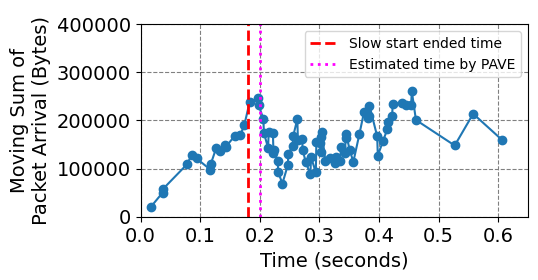

In [546]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming the base directory and file name are correctly specified.
subdir = 'starter_2024-04-14_23-06-15'
file_path = os.path.join('result', subdir, 'incoming_log.csv')

if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    # Load the data from CSV file
    df = pd.read_csv(file_path)

    # Normalize the 'Time' column so that the first entry starts at 0 and convert to seconds
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df['Time'] = (df['Time'] - df['Time'].min()) / 1e3  # Normalize and convert to seconds

    # Filter data for the specified time range
    start = 50
    end = 53.2
    df = df[(df['Time'] >= start) & (df['Time'] <= end)]
    df['Time'] -= start

    # Define the window size for the rolling sum
    window_size = 5  # for example, 3 data points

    # Calculate the rolling sum of packets
    df['Rolling_Packets'] = df['Packets'].rolling(window=window_size, min_periods=1).sum()

    # Ensure all data points for plotting are converted to numpy arrays
    time_values = df['Time'].to_numpy()
    rolling_packet_values = df['Rolling_Packets'].to_numpy()
    rolling_packet_values /= 1.4



    # Plotting
    plt.figure(figsize=(5, 2.5))  # Increase figure size for better readability
    plt.plot(time_values, rolling_packet_values, marker='o', linestyle='-')
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('Moving Sum of\n Packet Arrival (Bytes) ', fontsize=14)
    plt.grid(True, linestyle='--', color='grey')
    plt.tick_params(axis='both', labelsize=14)
    plt.ylim([0,4e5])
    plt.xlim([0,0.65])
    plt.xticks(np.arange(0, 0.7, 0.1))

    # Add a vertical red dotted line at x = 0.19
    plt.axvline(x=0.18, color='red', linestyle='--', linewidth=2, label='Slow start ended time')
    plt.axvline(x=0.2, color='magenta', linestyle='dotted', linewidth=2, label='Estimated time by PAVE')
    # Add a legend to the plot
    plt.legend()


    plt.show()

/tmp/ipykernel_1653378/2443655533.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('Time_bin').sum()  # Summing data within each bin


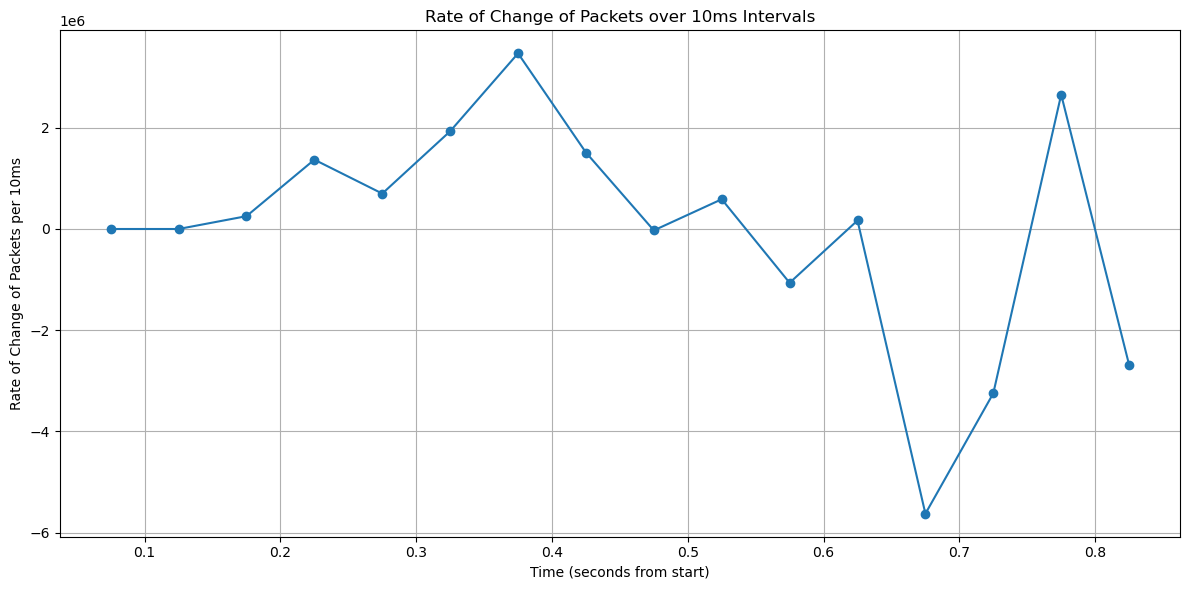

In [507]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming the base directory and file name are correctly specified.
subdir = 'starter_2024-04-14_23-06-15'
file_path = os.path.join('result', subdir, 'incoming_log.csv')

if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    # Load the data from CSV file
    df = pd.read_csv(file_path)

    # Normalize the 'Time' column so that the first entry starts at 0 and convert to seconds
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df['Time'] = (df['Time'] - df['Time'].min()) / 1e3  # Normalize and convert to seconds
    
    # Filter data for the specified time range
    start = 49.8
    end = 52
    df = df[(df['Time'] >= start) & (df['Time'] <= end)]
    df['Time'] -= start

    # Creating bins for every 10 milliseconds
    max_time = df['Time'].max()
    bins = np.arange(0, max_time + 0.05, 0.05)  # Adjust bin width if necessary
    labels = (bins[:-1] + bins[1:]) / 2  # Mid-points of bins

    # Binning the data
    df['Time_bin'] = pd.cut(df['Time'], bins=bins, labels=labels, right=False)
    df_grouped = df.groupby('Time_bin').sum()  # Summing data within each bin

    # Reset index for plotting
    df_grouped.reset_index(inplace=True)

    # Calculate the derivative (rate of change of packets)
    df_grouped['Packet_Delta'] = df_grouped['Packets'].diff() / 0.05  # Packet change per 10 ms

    # Convert to NumPy arrays for plotting to avoid issues
    time_values = df_grouped['Time_bin'].values  # Time bin values
    packet_delta_values = df_grouped['Packet_Delta'].values  # Packet rate of change

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(time_values, packet_delta_values, marker='o', linestyle='-')
    plt.title('Rate of Change of Packets over 10ms Intervals')
    plt.xlabel('Time (seconds from start)')
    plt.ylabel('Rate of Change of Packets per 10ms')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for tick labels
    plt.show()

In [497]:
time_values

array([0.017, 0.037, 0.038, 0.078, 0.086, 0.094, 0.117, 0.118, 0.127,
       0.134, 0.142, 0.143, 0.158, 0.167, 0.174, 0.183, 0.197, 0.198,
       0.206, 0.207, 0.214, 0.215, 0.222, 0.223, 0.224, 0.23 , 0.231,
       0.238, 0.247, 0.248, 0.255, 0.256, 0.263, 0.264, 0.271, 0.272,
       0.277, 0.285, 0.286, 0.294, 0.295, 0.301, 0.302, 0.303, 0.304,
       0.31 , 0.318, 0.327, 0.328, 0.335, 0.336, 0.343, 0.344, 0.345,
       0.351, 0.357, 0.367, 0.375, 0.382, 0.383, 0.384, 0.397, 0.398,
       0.407, 0.414, 0.415, 0.422, 0.423, 0.438, 0.446, 0.454, 0.455,
       0.462, 0.527, 0.558, 0.607])

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

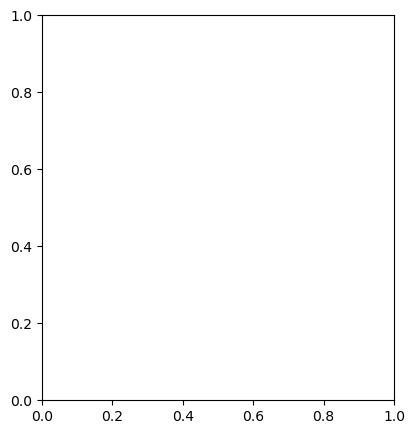

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming the base directory and file name are correctly specified.
subdir = 'starter_2024-04-14_23-06-15'
file_path = os.path.join('result', subdir, 'incoming_log.csv')

if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    # Load the data from CSV file
    df = pd.read_csv(file_path)

    # Normalize the 'Time' column so that the first entry starts at 0 and convert to seconds
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df['Time'] = (df['Time'] - df['Time'].min()) / 1e3  # Normalize and convert to seconds

    # Filter data for the specified time range
    start = 50.1
    end = 52
    df = df[(df['Time'] >= start) & (df['Time'] <= end)]
    df['Time'] -= start

    # Define the window size for the rolling sum
    window_size = 20  # for example, 3 data points

    # Calculate the rolling sum of packets
    df['Rolling_Packets'] = df['Packets'].rolling(window=window_size, min_periods=1).sum()

    # Calculate the derivative of Rolling_Packets
    df['Derivative'] = df['Rolling_Packets'].diff() / df['Time'].diff()

    # Ensure all data points for plotting are converted to numpy arrays
    time_values = df['Time'].to_numpy()
    rolling_packet_values = df['Rolling_Packets'].to_numpy()

     # Plotting the original rolling data
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(df['Time'], df['Rolling_Packets'], marker='o', linestyle='-')
    plt.title('Rolling Sum of Packets Over Time')
    plt.xlabel('Time (seconds from start of filtered interval)')
    plt.ylabel(f'Sum of Packets per {window_size * 10}ms Window')
    plt.grid(True)

    # Plotting the derivative
    plt.subplot(1, 2, 2)
    plt.plot(df['Time'], df['Derivative'], marker='o', linestyle='-')
    plt.title('Derivative of Rolling Sum of Packets')
    plt.xlabel('Time (seconds from start of filtered interval)')
    plt.ylabel('Rate of Change of Packets per Second')
    plt.grid(True)


In [431]:
# Calculate the derivative of Rolling_Packets
df['Derivative'] = df['Rolling_Packets'].diff() / df['Time'].diff()

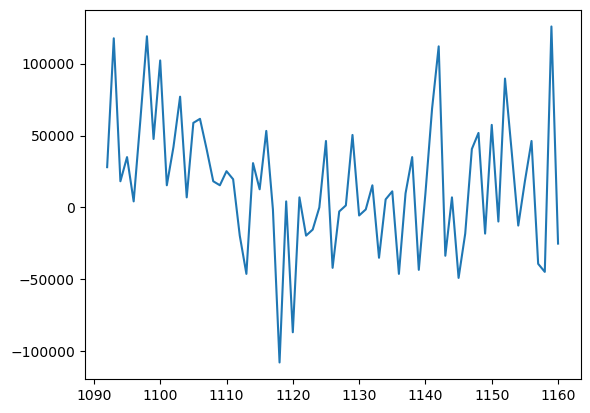

In [435]:
plt.plot(df['Rolling_Packets'].diff())

In [433]:
df['Rolling_Packets'].diff()

1091         NaN
1092     28000.0
1093    117600.0
1094     18200.0
1095     35000.0
          ...   
1156     46200.0
1157    -39200.0
1158    -44800.0
1159    125818.0
1160    -25148.0
Name: Rolling_Packets, Length: 70, dtype: float64

20.69363076923077
1.0031902430090913


/tmp/ipykernel_36956/28608589.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] -= start


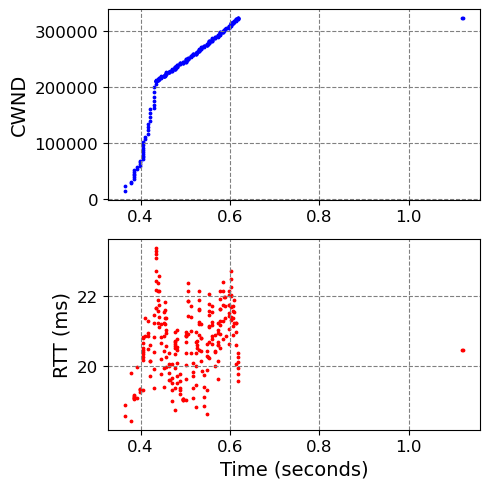

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Assuming subdir is provided correctly and 'cwnd.csv' is the correct file.
# subdir = 'defaultcubic400_2024-04-14_08-26-06'
#subdir = '800pave_2024-04-14_10-18-21'
#subdir = '400pave_2024-04-14_10-31-24'
subdir = 'cubic_2024-04-15_05-33-22'

file_path = os.path.join('result', subdir, 'cwnd.csv')

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    df = pd.read_csv(file_path, header=None, names=['Time', 'CWND', 'RTT'], on_bad_lines='skip')

    # Ensure 'Time' is a float and handle non-numeric with coercion
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)

    # Normalize the 'Time'
    df['Time'] = df['Time'] - df['Time'].min()
    df['Time'] /= 1e9

    df['RTT'] /= 1e3

    start = 5
    end = 100
    filtered_df = df[(df['Time'] >= start) & (df['Time'] <= end)]
    filtered_df['Time'] -= start

    # Convert Series to numpy arrays for compatibility with matplotlib
    time_values = filtered_df['Time'].to_numpy()
    cwnd_values = filtered_df['CWND'].to_numpy()
    rtt_values = filtered_df['RTT'].to_numpy()

    print(rtt_values.mean())
    print(rtt_values.std())

    # Plotting
    plt.figure(figsize=(5, 5))
    font_size = 14  # Size of axis titles
    tick_size = 12  # Size of tick labels

    #xlim_min = 85.8
    #xlim_max = 87
    ylim_min = df['RTT'].min()  -2 # Adjust as necessary
    ylim_max = df['RTT'].max() + 10 # Adjust as necessary
    #ylim_max = df['RTT'].min() + 20
    # Plot CWND
    plt.subplot(2, 1, 1)
    plt.scatter(time_values, cwnd_values, color='b', label='CWND', s=3) 
    plt.ylabel('CWND', fontsize=font_size)
    plt.grid(True, linestyle='--', color='grey')  # Dashed grey grid lines
    #plt.xlim([xlim_min, xlim_max])
    plt.tick_params(axis='both', labelsize=tick_size)  # Set tick label sizes

    # Plot RTT
    plt.subplot(2, 1, 2)
    plt.scatter(time_values, rtt_values, color='r', label='RTT', s = 3)
    plt.xlabel('Time (seconds)', fontsize=font_size)
    plt.ylabel('RTT (ms)', fontsize=font_size)
    plt.grid(True, linestyle='--', color='grey')  # Dashed grey grid lines
    
    #plt.xlim([xlim_min, xlim_max])
    plt.tick_params(axis='both', labelsize=tick_size)  # Set tick label sizes
    plt.tight_layout()
    plt.show()